<a href="https://colab.research.google.com/github/Anikethb05/Quantum-Computing/blob/main/Grover's_algorithm_Lab_2025_09_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grover's Algorithm Lab 2025-09-17 : 1RVU23CSE056

In [ ]:
#!pip install qiskit qiskit-aer pylatexenc

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit.library import MCMTGate, XGate
from matplotlib import pyplot as plt
import numpy as np
from qiskit.quantum_info import Statevector

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
def buildDiffuser(QC056, n):
    QC056.h(list(range(0, n)))
    QC056.x(list(range(0, n)))

    QC056.h(n-1)

    diff = MCMTGate(XGate(), n - 1, 1, ctrl_state="1" * (n-1))
    QC056.append(diff, list(range(0, n)))

    QC056.h(n-1)
    QC056.x(list(range(0, n)))
    QC056.h(list(range(0, n)))

    QC056.barrier()

    return QC056

def buildCircuit( n, states ):
  #Inititalization
  QC056=QuantumCircuit(n,n)
  for i in range(n-1):
    QC056.h(i)
  QC056.barrier()

  N=2**(n-1)
  M=len(states)

  k = int(np.floor((np.pi / 4) * np.sqrt(N/M)))

  for i in range(k):
    #Oracle
    for state in states:
      oracle=MCMTGate(XGate(),n-1,1,ctrl_state=state[::-1])
      QC056.append(oracle,list(range(0, n)))

    QC056.barrier()

    #diffuser
    QC056=buildDiffuser(QC056,n-1)

  return QC056




In [ ]:
n=int(input("Enter number of qubits in the system: "))
c=int(input("Enter number of states you want to search: "))
while not c <= 2 ** n:
  c=int(input(f"Enter number of states you want to search (<=2^{n}): "))
states=[]
for i in range(c):
  state=input(f"Enter binary state {i + 1} of {n} qubits : ")
  states.append(state)



Enter number of qubits in the system: 4
Enter number of states you want to search: 3
Enter binary state 1 of 4 qubits : 1010
Enter binary state 2 of 4 qubits : 0101
Enter binary state 3 of 4 qubits : 0110


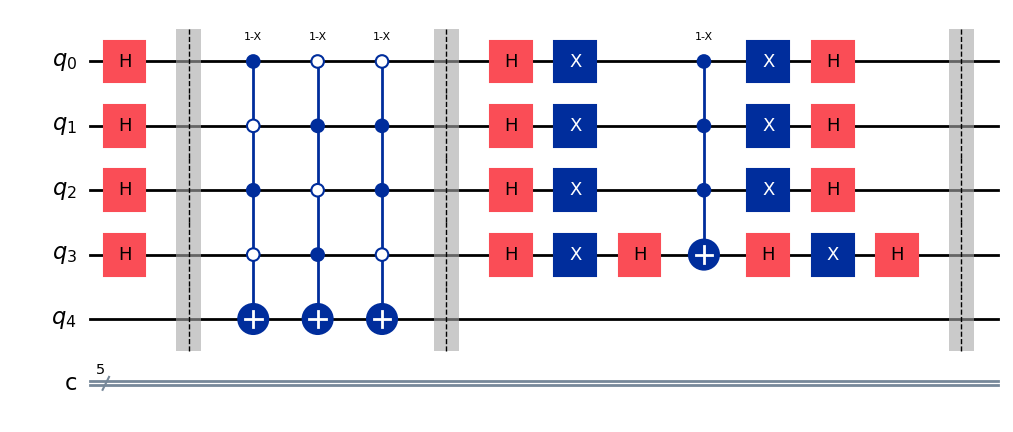

In [ ]:
QC056=buildCircuit(n+1,states)
QC056.draw('mpl')

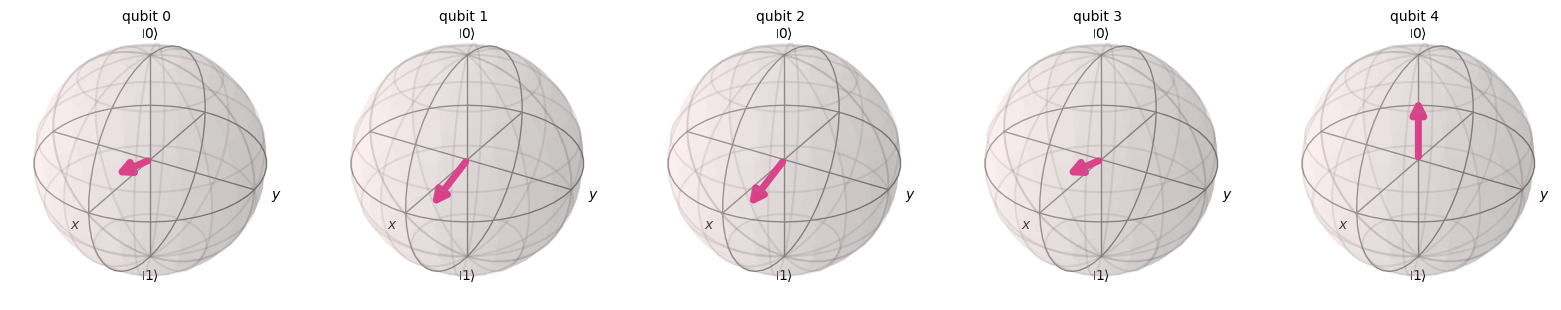

In [ ]:
State=Statevector(QC056)
plot_bloch_multivector(State)

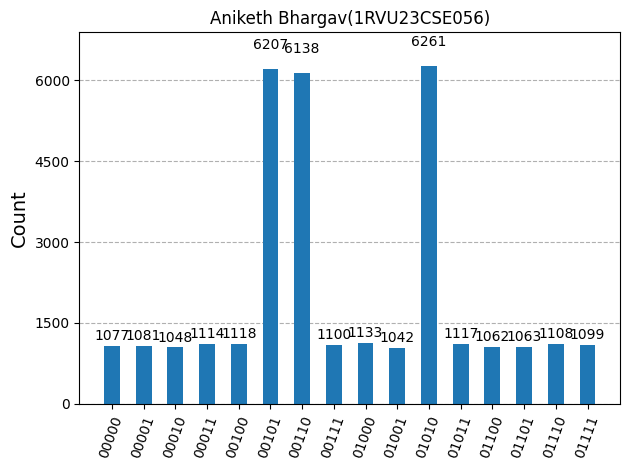

In [ ]:
QC056.measure(list(range(n)), list(range(n)))
backend=AerSimulator()
QCT=transpile(QC056,backend)
jobs=backend.run(QCT,shots=1024*32)
result=jobs.result()
counts=result.get_counts()
plot_histogram(counts,title="Aniketh Bhargav(1RVU23CSE056)")